In [1]:
import numpy as np
from scipy.sparse import rand

N = 5  # Number of reservoir nodes
density = 0.09  # 5% nonzero connections

# Create a sparse random reservoir weight matrix
W = rand(N, N, density=density, format='csr')  # sparse format
# W = W.toarray() * 2 - 1  # Scale to [-1, 1]
W.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.03108305],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39655878, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

# Load from CSV; There are 160 samples in total
###################################################################################
# The data can be downloaded in google drive
# https://drive.google.com/file/d/1tXhUxj3wRVYMQ0dB-itdJwoS2FmHDDvW/view?usp=drive_link
###################################################################################
X = np.loadtxt('ns_out_4000.csv', delimiter=',')   # shape (20, 160)
Y_real = np.loadtxt('rho_out_real_4000.csv', delimiter=',')     # shape (2401, 160)
Y_imag = np.loadtxt('rho_out_imag_4000.csv', delimiter=',')     # shape (2401, 160)

# Transpose to get shape (160, 20) and (160, 2401)
X = X.T
Y_real = Y_real.T
Y_imag = Y_imag.T

# split the data
#X_train, X_test, y_train, y_test = train_test_split(features, target_real, test_size=0.25, random_state=42)

X_train, X_test, Y_real_train, Y_real_test, Y_imag_train, Y_imag_test = train_test_split(
    X, Y_real, Y_imag, test_size=0.25)

# Optional: print shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_real_train:", Y_real_train.shape)
print("Y_real_test:", Y_real_test.shape)
print("Y_imag_train:", Y_imag_train.shape)
print("Y_imag_test:", Y_imag_test.shape)


X_train: (3000, 20)
X_test: (1000, 20)
Y_real_train: (3000, 2401)
Y_real_test: (1000, 2401)
Y_imag_train: (3000, 2401)
Y_imag_test: (1000, 2401)


In [3]:
X

array([[0.090953, 0.091251, 0.091807, ..., 0.091367, 0.091035, 0.090985],
       [0.090954, 0.091251, 0.091808, ..., 0.091367, 0.091035, 0.090985],
       [0.090954, 0.091252, 0.091809, ..., 0.091368, 0.091035, 0.090985],
       ...,
       [0.091123, 0.091806, 0.093104, ..., 0.092015, 0.091228, 0.091105],
       [0.091123, 0.091804, 0.093101, ..., 0.092014, 0.091227, 0.091105],
       [0.091122, 0.091803, 0.093098, ..., 0.092012, 0.091227, 0.091105]])

In [4]:
#Here we introduce two models, one for the real part and one for the imaginary part
import tensorflow as tf
from tensorflow.keras import layers, Sequential

input_dim = np.shape(X_train)[1]
output_dim = np.shape(Y_real_train)[1]

#-----------------model_real
model_real = Sequential()
model_real.add(layers.Dense(64, activation='linear', input_shape=(input_dim,)))
#model_real.add(layers.Dense(128, activation='relu'))
model_real.add(layers.Dense(output_dim))

from tensorflow.keras.optimizers import Adam
learning_rate = 0.001 
adam = Adam(learning_rate=learning_rate)

model_real.compile(optimizer=adam, loss='mse')

#--------------------model_imag
model_imag = Sequential()
model_imag.add(layers.Dense(64, activation='linear', input_shape=(input_dim,)))
#model_imag.add(layers.Dense(128, activation='relu'))
model_imag.add(layers.Dense(output_dim))

model_imag.compile(optimizer='adam', loss='mse')

In [5]:
history_real=model_real.fit(X_train, Y_real_train, epochs=500, batch_size=100, validation_split=0.2)
history_imag=model_imag.fit(X_train, Y_imag_train, epochs=500, batch_size=100, validation_split=0.2)

Epoch 1/500
24/24 [==============================] - 1s 10ms/step - loss: 4.2230e-04 - val_loss: 2.5316e-04
Epoch 2/500
24/24 [==============================] - 0s 4ms/step - loss: 2.0937e-04 - val_loss: 1.6626e-04
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 1.3340e-04 - val_loss: 1.1046e-04
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 9.5956e-05 - val_loss: 8.8001e-05
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 7.4167e-05 - val_loss: 6.4532e-05
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 5.3538e-05 - val_loss: 4.4158e-05
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 3.6502e-05 - val_loss: 2.8816e-05
Epoch 8/500
24/24 [==============================] - 0s 3ms/step - loss: 2.5538e-05 - val_loss: 2.0815e-05
Epoch 9/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0902e-05 - val_loss: 1.8212e-05
Epoch 10/500
24/24 [================

Epoch 77/500
24/24 [==============================] - 0s 4ms/step - loss: 1.7356e-05 - val_loss: 1.5459e-05
Epoch 78/500
24/24 [==============================] - 0s 4ms/step - loss: 1.7267e-05 - val_loss: 1.5354e-05
Epoch 79/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7269e-05 - val_loss: 1.5289e-05
Epoch 80/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7324e-05 - val_loss: 1.5587e-05
Epoch 81/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7283e-05 - val_loss: 1.5657e-05
Epoch 82/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7332e-05 - val_loss: 1.5383e-05
Epoch 83/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7287e-05 - val_loss: 1.5410e-05
Epoch 84/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7248e-05 - val_loss: 1.5422e-05
Epoch 85/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7347e-05 - val_loss: 1.6320e-05
Epoch 86/500
24/24 [========

24/24 [==============================] - 0s 4ms/step - loss: 1.7254e-05 - val_loss: 1.5236e-05
Epoch 153/500
24/24 [==============================] - 0s 4ms/step - loss: 1.7191e-05 - val_loss: 1.5414e-05
Epoch 154/500
24/24 [==============================] - 0s 4ms/step - loss: 1.7232e-05 - val_loss: 1.5248e-05
Epoch 155/500
24/24 [==============================] - 0s 4ms/step - loss: 1.7170e-05 - val_loss: 1.5509e-05
Epoch 156/500
24/24 [==============================] - 0s 4ms/step - loss: 1.7231e-05 - val_loss: 1.5190e-05
Epoch 157/500
24/24 [==============================] - 0s 4ms/step - loss: 1.7113e-05 - val_loss: 1.5376e-05
Epoch 158/500
24/24 [==============================] - 0s 4ms/step - loss: 1.7221e-05 - val_loss: 1.5345e-05
Epoch 159/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7223e-05 - val_loss: 1.5325e-05
Epoch 160/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7220e-05 - val_loss: 1.5144e-05
Epoch 161/500
24/24 [============

24/24 [==============================] - 0s 4ms/step - loss: 1.7112e-05 - val_loss: 1.5482e-05
Epoch 228/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7217e-05 - val_loss: 1.5200e-05
Epoch 229/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7168e-05 - val_loss: 1.5613e-05
Epoch 230/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7178e-05 - val_loss: 1.5647e-05
Epoch 231/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7201e-05 - val_loss: 1.5526e-05
Epoch 232/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7205e-05 - val_loss: 1.5254e-05
Epoch 233/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7192e-05 - val_loss: 1.5173e-05
Epoch 234/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7198e-05 - val_loss: 1.5275e-05
Epoch 235/500
24/24 [==============================] - 0s 4ms/step - loss: 1.7090e-05 - val_loss: 1.5426e-05
Epoch 236/500
24/24 [============

24/24 [==============================] - 0s 3ms/step - loss: 1.6998e-05 - val_loss: 1.5225e-05
Epoch 303/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6973e-05 - val_loss: 1.5103e-05
Epoch 304/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7051e-05 - val_loss: 1.4948e-05
Epoch 305/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6941e-05 - val_loss: 1.5173e-05
Epoch 306/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7210e-05 - val_loss: 1.6243e-05
Epoch 307/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7218e-05 - val_loss: 1.5064e-05
Epoch 308/500
24/24 [==============================] - 0s 4ms/step - loss: 1.6967e-05 - val_loss: 1.5055e-05
Epoch 309/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7004e-05 - val_loss: 1.5610e-05
Epoch 310/500
24/24 [==============================] - 0s 3ms/step - loss: 1.7000e-05 - val_loss: 1.5227e-05
Epoch 311/500
24/24 [============

24/24 [==============================] - 0s 3ms/step - loss: 1.6736e-05 - val_loss: 1.4759e-05
Epoch 378/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6823e-05 - val_loss: 1.5285e-05
Epoch 379/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6931e-05 - val_loss: 1.4860e-05
Epoch 380/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6789e-05 - val_loss: 1.4927e-05
Epoch 381/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6840e-05 - val_loss: 1.5019e-05
Epoch 382/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6762e-05 - val_loss: 1.5163e-05
Epoch 383/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6777e-05 - val_loss: 1.4998e-05
Epoch 384/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6713e-05 - val_loss: 1.4817e-05
Epoch 385/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6831e-05 - val_loss: 1.5443e-05
Epoch 386/500
24/24 [============

24/24 [==============================] - 0s 3ms/step - loss: 1.6575e-05 - val_loss: 1.4892e-05
Epoch 453/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6821e-05 - val_loss: 1.5036e-05
Epoch 454/500
24/24 [==============================] - 0s 4ms/step - loss: 1.7085e-05 - val_loss: 1.4933e-05
Epoch 455/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6666e-05 - val_loss: 1.4696e-05
Epoch 456/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6527e-05 - val_loss: 1.4806e-05
Epoch 457/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6502e-05 - val_loss: 1.4881e-05
Epoch 458/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6668e-05 - val_loss: 1.6082e-05
Epoch 459/500
24/24 [==============================] - 0s 3ms/step - loss: 1.6787e-05 - val_loss: 1.5767e-05
Epoch 460/500
24/24 [==============================] - 0s 4ms/step - loss: 1.6558e-05 - val_loss: 1.4787e-05
Epoch 461/500
24/24 [============

24/24 [==============================] - 0s 4ms/step - loss: 2.0796e-05 - val_loss: 1.8684e-05
Epoch 28/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0727e-05 - val_loss: 1.8520e-05
Epoch 29/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0838e-05 - val_loss: 1.8677e-05
Epoch 30/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0729e-05 - val_loss: 1.8510e-05
Epoch 31/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0767e-05 - val_loss: 1.8934e-05
Epoch 32/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0754e-05 - val_loss: 1.8542e-05
Epoch 33/500
24/24 [==============================] - 0s 4ms/step - loss: 2.0689e-05 - val_loss: 1.8510e-05
Epoch 34/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0777e-05 - val_loss: 1.8658e-05
Epoch 35/500
24/24 [==============================] - 0s 4ms/step - loss: 2.0688e-05 - val_loss: 1.8675e-05
Epoch 36/500
24/24 [=====================

Epoch 103/500
24/24 [==============================] - 0s 4ms/step - loss: 2.0658e-05 - val_loss: 1.8307e-05
Epoch 104/500
24/24 [==============================] - 0s 4ms/step - loss: 2.0598e-05 - val_loss: 1.8660e-05
Epoch 105/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0637e-05 - val_loss: 1.8626e-05
Epoch 106/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0814e-05 - val_loss: 1.8732e-05
Epoch 107/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0864e-05 - val_loss: 1.8450e-05
Epoch 108/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0644e-05 - val_loss: 1.8607e-05
Epoch 109/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0644e-05 - val_loss: 1.8486e-05
Epoch 110/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0568e-05 - val_loss: 1.8412e-05
Epoch 111/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0737e-05 - val_loss: 1.8719e-05
Epoch 112/500
24/24

24/24 [==============================] - 0s 3ms/step - loss: 2.0556e-05 - val_loss: 1.8231e-05
Epoch 179/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0540e-05 - val_loss: 1.8285e-05
Epoch 180/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0520e-05 - val_loss: 1.8293e-05
Epoch 181/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0547e-05 - val_loss: 1.8306e-05
Epoch 182/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0514e-05 - val_loss: 1.8316e-05
Epoch 183/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0644e-05 - val_loss: 1.8544e-05
Epoch 184/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0499e-05 - val_loss: 1.8236e-05
Epoch 185/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0474e-05 - val_loss: 1.8230e-05
Epoch 186/500
24/24 [==============================] - 0s 4ms/step - loss: 2.0512e-05 - val_loss: 1.8598e-05
Epoch 187/500
24/24 [============

24/24 [==============================] - 0s 3ms/step - loss: 2.0295e-05 - val_loss: 1.8530e-05
Epoch 254/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0328e-05 - val_loss: 1.8254e-05
Epoch 255/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0382e-05 - val_loss: 1.9750e-05
Epoch 256/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0622e-05 - val_loss: 1.8442e-05
Epoch 257/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0285e-05 - val_loss: 1.8217e-05
Epoch 258/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0329e-05 - val_loss: 1.8249e-05
Epoch 259/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0289e-05 - val_loss: 1.8143e-05
Epoch 260/500
24/24 [==============================] - 0s 4ms/step - loss: 2.0294e-05 - val_loss: 1.8161e-05
Epoch 261/500
24/24 [==============================] - 0s 4ms/step - loss: 2.0333e-05 - val_loss: 1.8488e-05
Epoch 262/500
24/24 [============

24/24 [==============================] - 0s 3ms/step - loss: 2.0139e-05 - val_loss: 1.7955e-05
Epoch 329/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0089e-05 - val_loss: 1.8092e-05
Epoch 330/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0292e-05 - val_loss: 1.8404e-05
Epoch 331/500
24/24 [==============================] - 0s 4ms/step - loss: 2.0128e-05 - val_loss: 1.8329e-05
Epoch 332/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0073e-05 - val_loss: 1.8472e-05
Epoch 333/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0197e-05 - val_loss: 1.7925e-05
Epoch 334/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0147e-05 - val_loss: 1.7949e-05
Epoch 335/500
24/24 [==============================] - 0s 4ms/step - loss: 2.0136e-05 - val_loss: 1.8105e-05
Epoch 336/500
24/24 [==============================] - 0s 4ms/step - loss: 2.0338e-05 - val_loss: 1.9751e-05
Epoch 337/500
24/24 [============

24/24 [==============================] - 0s 4ms/step - loss: 2.0198e-05 - val_loss: 1.8080e-05
Epoch 404/500
24/24 [==============================] - 0s 3ms/step - loss: 1.9887e-05 - val_loss: 1.8009e-05
Epoch 405/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0227e-05 - val_loss: 1.8314e-05
Epoch 406/500
24/24 [==============================] - 0s 3ms/step - loss: 1.9912e-05 - val_loss: 1.7775e-05
Epoch 407/500
24/24 [==============================] - 0s 3ms/step - loss: 1.9915e-05 - val_loss: 1.7792e-05
Epoch 408/500
24/24 [==============================] - 0s 3ms/step - loss: 1.9880e-05 - val_loss: 1.8083e-05
Epoch 409/500
24/24 [==============================] - 0s 3ms/step - loss: 1.9862e-05 - val_loss: 1.8665e-05
Epoch 410/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0011e-05 - val_loss: 1.7830e-05
Epoch 411/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0036e-05 - val_loss: 1.8563e-05
Epoch 412/500
24/24 [============

24/24 [==============================] - 0s 4ms/step - loss: 1.9929e-05 - val_loss: 1.8787e-05
Epoch 479/500
24/24 [==============================] - 0s 3ms/step - loss: 1.9986e-05 - val_loss: 1.8324e-05
Epoch 480/500
24/24 [==============================] - 0s 3ms/step - loss: 1.9659e-05 - val_loss: 1.7486e-05
Epoch 481/500
24/24 [==============================] - 0s 3ms/step - loss: 1.9914e-05 - val_loss: 1.7641e-05
Epoch 482/500
24/24 [==============================] - 0s 3ms/step - loss: 1.9691e-05 - val_loss: 1.7502e-05
Epoch 483/500
24/24 [==============================] - 0s 3ms/step - loss: 1.9762e-05 - val_loss: 1.7576e-05
Epoch 484/500
24/24 [==============================] - 0s 4ms/step - loss: 1.9739e-05 - val_loss: 1.8264e-05
Epoch 485/500
24/24 [==============================] - 0s 3ms/step - loss: 1.9791e-05 - val_loss: 1.8132e-05
Epoch 486/500
24/24 [==============================] - 0s 3ms/step - loss: 2.0171e-05 - val_loss: 1.7618e-05
Epoch 487/500
24/24 [============

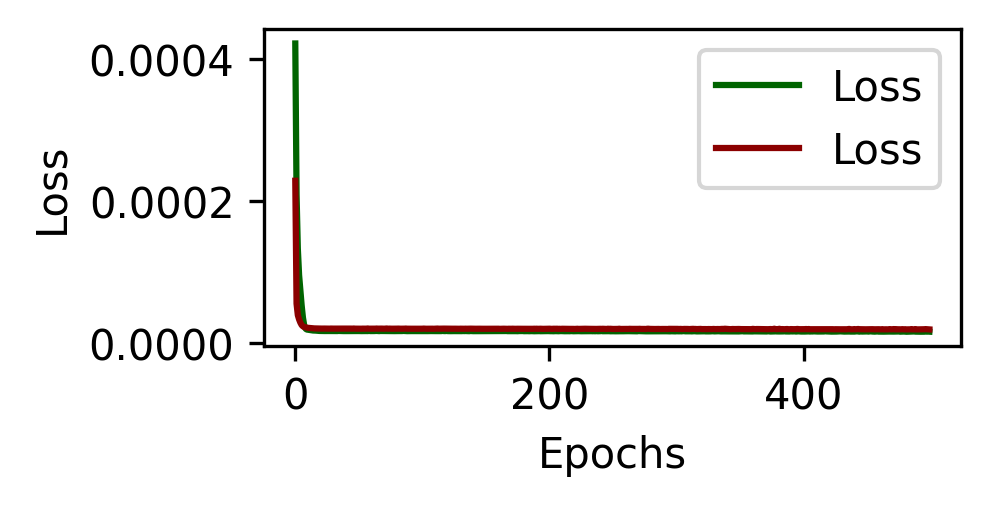

In [11]:
fig,ax = plt.subplots(1,1, figsize=(3,1.4),dpi=300)
plt.plot((history_real.history['loss']), label='Loss',c='Darkgreen')
plt.plot((history_imag.history['loss']), label='Loss',c='Darkred')
#plt.yscale("log")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
#-----------------predition of the models and output rho_pred
Y_real_pred = model_real.predict(X_test)
Y_imag_pred = model_imag.predict(X_test)
rho_pred_vector = Y_real_pred + 1j * Y_imag_pred

Average Fidelity: 0.9177129640778533


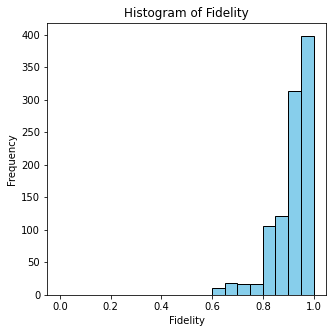

In [8]:
#------------------------Fiedelity
#we reshape the rho_pred_vector to matrix
rho_pred = rho_pred_vector.reshape(-1, 49, 49) #this is in the form of (40,49,49)
#print("shape of rho_pred_out:", rho_pred.shape)
#we do the same using the test data and reshape them into a matrix
rho_test_vector=Y_real_test+1j* Y_imag_test
rho_test=rho_test_vector.reshape(-1, 49, 49)

#for each matrix we calculate the fidelity
from scipy.linalg import sqrtm

Fid = []#fidelity of mixed states
n_samples=np.shape(rho_test)[0]

for i in range(n_samples):
    rho = rho_test[i]
    sigma = rho_pred[i]

    sigma = sigma / np.trace(sigma)
    
    sqrt_rho = sqrtm(rho)

    # Compute the product sqrt(rho) * sigma * sqrt(rho)
    inner = sqrt_rho @ sigma @ sqrt_rho

    # Take sqrt of that product
    sqrt_inner = sqrtm(inner)

    # Fidelity is the square of the trace of the above
    ff = np.real(np.trace(sqrt_inner))**2


    #fidelity = min(max(ff, 0.0), 1.0)

    Fid.append(ff)

Fid_array = np.array(Fid)
print("Average Fidelity:", np.mean(Fid_array))


import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.hist(Fid_array, bins=20, range=(0, 1), color='skyblue', edgecolor='black')
plt.xlabel('Fidelity')
plt.ylabel('Frequency')
plt.title('Histogram of Fidelity')
# plt.grid(True)
plt.show()

C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'g2_pred')

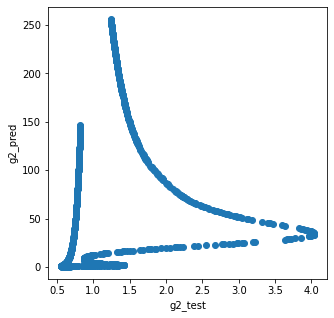

In [9]:
#------------------calculating g2 using rho_pred and rho_test can compare them to each other
from scipy.sparse import eye as speye, diags, kron
from scipy.sparse import csc_matrix

# Parameters
Na1 = 6
Na2 = 6
dima1 = Na1 + 1
dima2 = Na2 + 1
dimtot = dima1 * dima2

# Identity matrices
Ia1 = speye(dima1, format='csc')  
Ia2 = speye(dima2, format='csc')  
Itot = speye(dimtot, format='csc') 

# Creation operators (a†)
a1 = diags(np.sqrt(np.arange(1, dima1)), offsets=1, shape=(dima1, dima1), format='csc')
a2 = diags(np.sqrt(np.arange(1, dima2)), offsets=1, shape=(dima2, dima2), format='csc')

# Lift to full Hilbert space
a1 = kron(a1, Ia2, format='csc')
a2 = kron(Ia1, a2, format='csc')

g2_a1_test=[]
g2_a1_pred=[]

for i in range(n_samples):
    rho = rho_test[i]
    rho = rho / np.trace(rho)
    numerator = (a1.getH() @ a1 @ a1.getH() @ a1 - a1.getH() @ a1) @ rho
    denominator = (a1.getH() @ a1 @ rho).diagonal().sum() 
    g2_a1_test.append(numerator.diagonal().sum() / (denominator ** 2))

    del rho
    rho = rho_pred[i]
    numerator = (a1.getH() @ a1 @ a1.getH() @ a1 - a1.getH() @ a1) @ rho
    denominator = (a1.getH() @ a1 @ rho).diagonal().sum() 
    g2_a1_pred.append (numerator.diagonal().sum() / (denominator ** 2))

plt.figure(figsize=(5, 5))
plt.plot( np.array(g2_a1_test), np.array(g2_a1_pred),'o')
plt.xlabel('g2_test')
plt.ylabel('g2_pred')

C:\Users\kodo0\.conda\envs\python3_6\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
No handles with labels found to put in legend.


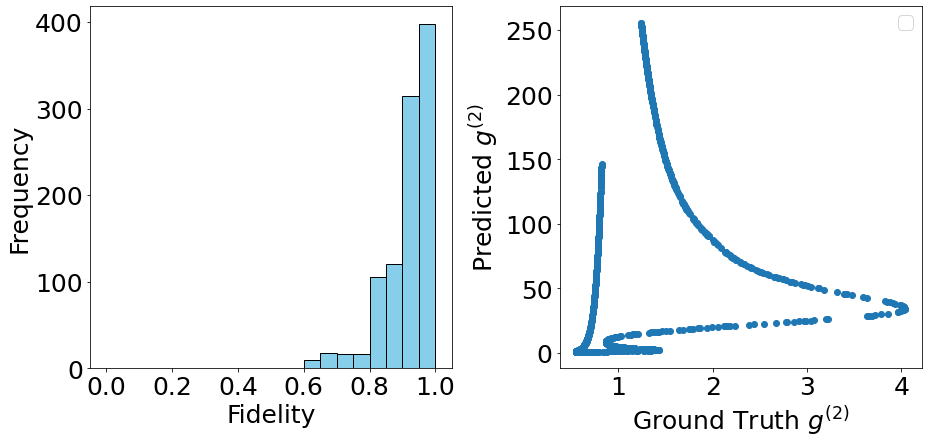

In [12]:
fig, axs = plt.subplots(1,2, figsize=(13, 13))

font_size = 25
axs[0].tick_params(axis ='y',labelsize=25)
axs[0].tick_params(axis ='x',labelsize=font_size)
# axs[0].plot(Delta_extended, g2_case3_extended, color='cornflowerblue',linewidth=5)
axs[0].hist(Fid_array, bins=20, range=(0, 1), color='skyblue', edgecolor='black')
# axs[0].set_yticks([1,2,3,4])
axs[0].set_xticks([0,0.2,0.4,0.6,0.8,1])
axs[0].set_xlabel('Fidelity',fontsize=font_size)
axs[0].set_ylabel('Frequency',fontsize=font_size)
# t = axs[0].twinx()
# t.tick_params(axis ='y', labelcolor = 'tomato',labelsize=font_size)
# t.plot(Delta_extended, nn_classic, color='tomato',linewidth=5)
# t.set_yticks([0.1,0.3,0.5,0.7])
# t.set_ylabel('$<a^{\dagger}a>$',fontsize=font_size, color='tomato')
axs[0].set_box_aspect(1)
# axs[0].grid(True)
# axs[0].text(-0.01,445,'(a)',fontsize=40)


axs[1].set_ylabel('Predicted $g^{(2)}$',fontsize=font_size)
axs[1].set_xlabel('Ground Truth $g^{(2)}$',fontsize=font_size)
# axs[1].plot(Y_test_r, Y_test_g2,label = 'Ground Truth')
# axs[1].plot(Delta_extended, g2_case3_extended, label='Ground Truth',linewidth=2)
# axs[1].scatter(Y_test_r, Y_predict_RFR,marker="o",s=25,label = 'Reservoir',color='orange')
# axs[1].scatter(Y_test_r_c, Y_predict_RFR_classic,marker="s",s=25,label = 'No reservoir', alpha=0.5, color='green')
axs[1].scatter(np.array(g2_a1_test), np.array(g2_a1_pred))
axs[1].tick_params(labelsize=font_size)
# axs[1].set_xticks([-10,-5,0,5,10])
axs[1].set_box_aspect(1)
# axs[1].yaxis.set_label_position("left")
# axs[1].yaxis.tick_right()
axs[1].legend(fontsize=18,markerscale=2,handletextpad=0.5, loc=1)
# axs[1].text(0.5,220,'(b)',fontsize=40)
# axs[1].tick_params(axis ='y', labelcolor = 'g')
# axs[1].twinx().tick_params(axis ='y', labelcolor = 'b')


# axs[1,0].tick_params(axis ='y', labelcolor = 'g')
# axs[1,0].twinx().tick_params(axis ='y', labelcolor = 'b')

# axs[1,1].tick_params(axis ='y', labelcolor = 'g')
# axs[1,1].twinx().tick_params(axis ='y', labelcolor = 'b')


# fig.supylabel('Green label', color='g')
plt.tight_layout()
plt.savefig("fidelity.pdf", format="pdf", bbox_inches="tight")